In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
%matplotlib inline



In [2]:
df = pd.read_csv('airfoil_self_noise.dat', sep = '\t', header = None)

In [3]:
df.head()

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [5]:
df.columns = ['Frequency','Angle of attack', 'Chord Length', 'Free-stream velocity', 'Suction side', 'Pressure level']

In [6]:
df.head()

,Frequency,Angle of attack,Chord Length,Free-stream velocity,Suction side,Pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [7]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.33, random_state = 42)

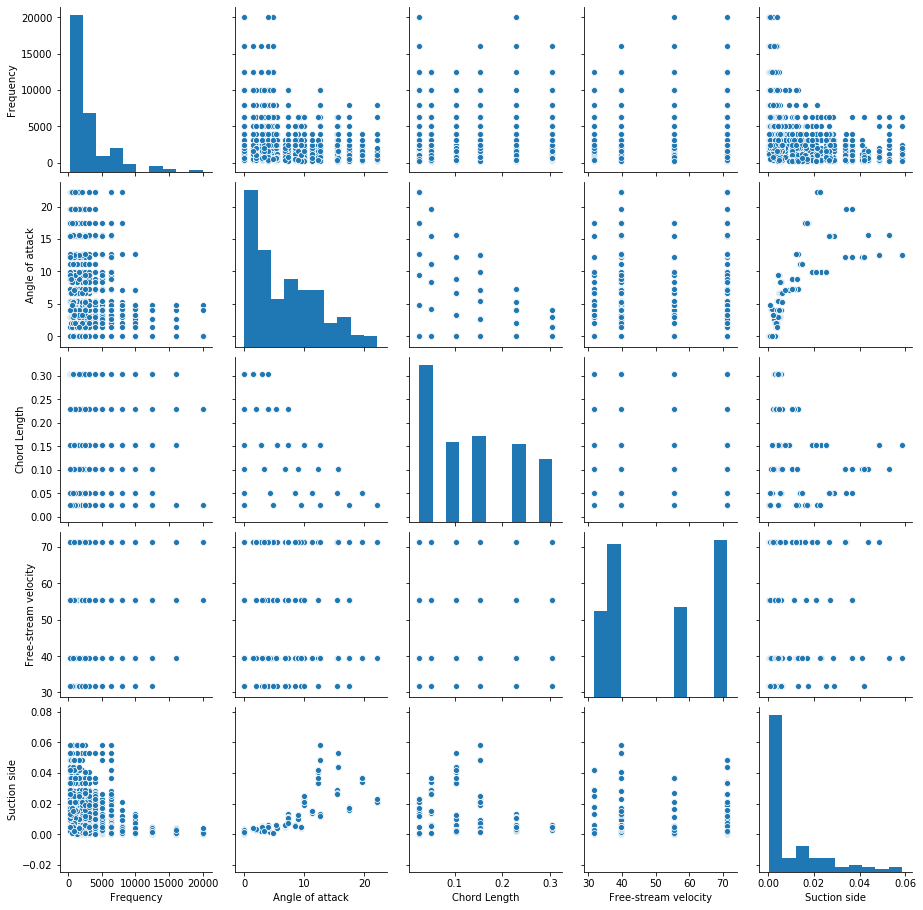

In [9]:
import seaborn as sns
sns.pairplot(X_train)

In [10]:
X_train.corr()

,Frequency,Angle of attack,Chord Length,Free-stream velocity,Suction side
Frequency,1.000000,-0.273327,-0.000324,0.125247,-0.239878
Angle of attack,-0.273327,1.000000,-0.498257,0.058603,0.762567
Chord Length,-0.000324,-0.498257,1.000000,0.013061,-0.220849
Free-stream velocity,0.125247,0.058603,0.013061,1.000000,-0.000519
Suction side,-0.239878,0.762567,-0.220849,-0.000519,1.000000


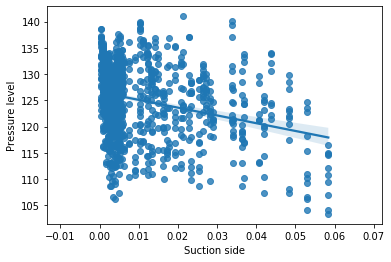

In [11]:
sns.regplot(x=X_train['Suction side'], y=y_train)

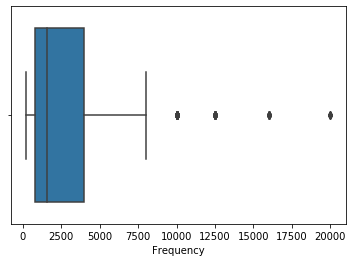

In [12]:
sns.boxplot(X_train.Frequency)

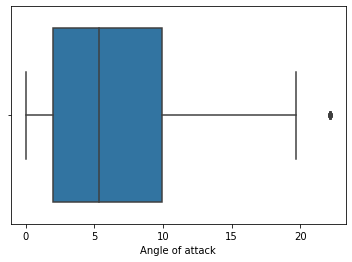

In [13]:
sns.boxplot(X_train['Angle of attack'])

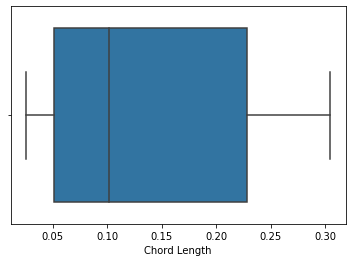

In [14]:
sns.boxplot(X_train['Chord Length'])

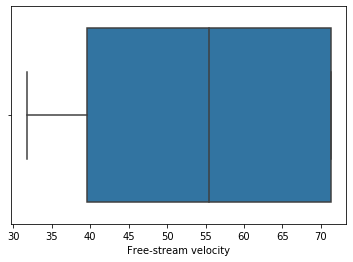

In [15]:
sns.boxplot(X_train['Free-stream velocity'])

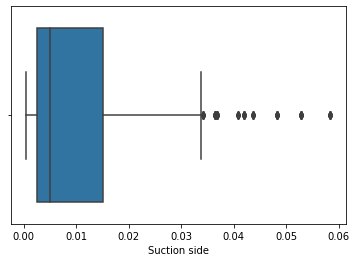

In [16]:
sns.boxplot(X_train['Suction side'])

In [17]:
import pandas_profilin

ModuleNotFoundError: No module named 'pandas_profilin'

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[-0.77874405, -1.13527475,  1.76871991, -1.26448923, -0.58688211],
       [-0.51818809,  0.96680116, -0.39084475, -1.26448923,  2.38655541],
       [-0.13501757, -0.45167283,  1.76871991, -0.75808881, -0.39537372],
       ...,
       [-0.51818809, -0.45167283,  0.95888316, -1.26448923, -0.44978594],
       [-0.51818809, -1.13527475, -0.93073591,  1.27392301, -0.78521301],
       [-0.28828578, -0.57130316, -0.39084475,  1.27392301, -0.68592026]])

In [19]:
from sklearn.linear_model import LinearRegression,ElasticNet,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error

In [20]:
reg1 = LinearRegression()
reg1.fit(X_train,y_train)
print(reg1.score(X_train,y_train))
y_pred = reg1.predict(X_test)
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.5154777137019573
22.954669535134126
0.5124474986138428


In [21]:
reg2 = ElasticNet()
reg2.fit(X_train,y_train)
print(reg2.score(X_train,y_train))
y_pred = reg2.predict(X_test)
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.2771559399460769
35.37789559280353
0.2485807097484366


In [22]:
reg3 = Ridge()
reg3.fit(X_train,y_train)
print(reg3.score(X_train,y_train))
y_pred = reg3.predict(X_test)
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.4853404009699578
24.627617881772988
0.47691441677856783


In [23]:
reg4 = RandomForestRegressor(n_estimators=100)
reg4.fit(X_train,y_train)
print(reg4.score(X_train,y_train))
y_pred = reg4.predict(X_test)
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.9890364116330176
3.4334367534102803
0.9270745032981558


In [24]:
reg5 = SVR()
reg5.fit(X_train,y_train)
print(reg5.score(X_train,y_train))
y_pred = reg5.predict(X_test)
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.2055748908701499
41.59647602713669
0.11649932904332205


In [32]:
import pickle
pickle.dump(reg4, open('model.pkl', 'wb'))

In [26]:
!pip install flask

In [33]:
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(X_test)

array([124.17785, 119.38106, 119.1977 , 135.81127, 134.20678, 123.94999,
       124.11563, 133.6958 , 134.86879, 127.85216, 126.95276, 112.87978,
       132.94839, 132.19591, 125.13693, 108.25777, 129.72162, 130.21358,
       128.33955, 125.12603, 125.01933, 127.37173, 110.92868, 125.71849,
       124.0827 , 125.94325, 129.85804, 131.13046, 109.61061, 130.30653,
       131.91121, 122.09889, 128.64247, 119.09611, 119.42649, 132.30284,
       133.70455, 129.92101, 120.86478, 112.13675, 125.49992, 134.87798,
       126.8213 , 121.41862, 126.66595, 134.43254, 130.1853 , 119.15019,
       121.92298, 133.71788, 132.47612, 114.29384, 129.49673, 126.85236,
       126.75492, 120.94139, 123.63546, 129.59633, 122.18192, 119.01312,
       126.07631, 134.25368, 130.56603, 133.38311, 117.58026, 125.22862,
       123.03039, 120.02587, 126.59562, 129.62005, 129.22539, 130.0417 ,
       128.7901 , 116.71238, 129.51476, 128.05992, 130.00883, 132.65573,
       134.16106, 135.45078, 125.37891, 120.20451, 